In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result
import mmcv
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
config_file = '../configs/htc/htc_dconv_c3-c5_mstrain_400_1400_x101_64x4d_fpn_20e.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../checkpoints/htc_dconv_c3-c5_mstrain_400_1400_x101_64x4d_fpn_20e_20190408-0e50669c.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [9]:
# test a single image
from time import sleep
from IPython import display
video = mmcv.VideoReader('su/naver1.mp4')
for i in range(len(video)):
    img = video[i]
    #result = inference_detector(model, img)
    #image = show_result(img, result, model.CLASSES, wait_time=1,show=False)
    path = 'su/frames2/' + str(i) + '.jpg'
    mmcv.imwrite(img, path)
mmcv.frames2video('su/frames2','su/frames2/video.mp4')

FileNotFoundError: The start frame not found: su/frames2/000000.jpg

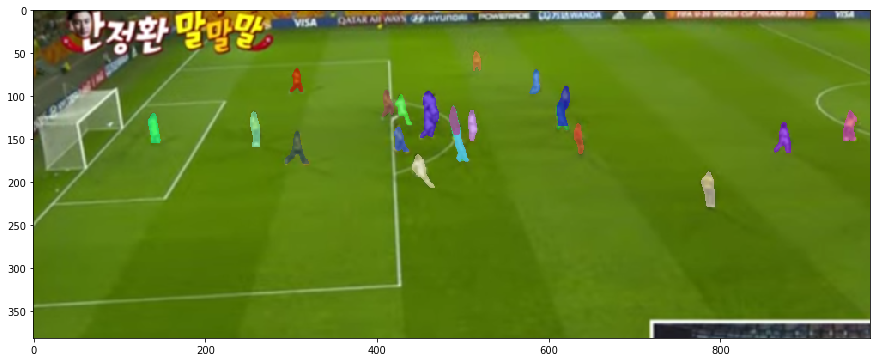

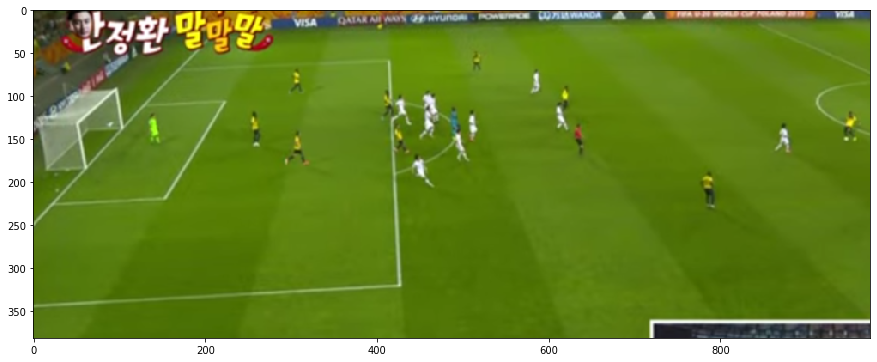

In [5]:
# show the results
img = 'su/12.PNG'
result = inference_detector(model, img)
show_result_pyplot(img, result, model.CLASSES,score_thr=0.45)
image = mmcv.imread(img)
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(image))

In [35]:
mmcv.frames2video('su/frames2','su/frames2/video3.mp4',filename_tmpl='{:02d}.jpg', fps=10, fourcc='MJPG')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 37/37, 179.3 task/s, elapsed: 0s, ETA:     0s


In [67]:
from time import sleep
from IPython import display
video = mmcv.VideoReader('su/video.mp4')
for i in range(len(video)):
    img = video[i]
    result = inference_detector(model, img)
    image = show_result(img, result, model.CLASSES, show=False,score_thr=0.24)
    path = 'su/frames3/' + "{:02d}".format(i) + '.jpg'
    mmcv.imwrite(image, path)
mmcv.frames2video('su/frames3','su/frames3/video.avi',filename_tmpl='{:02d}.jpg', fps=10, fourcc='MJPG')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 36/36, 164.5 task/s, elapsed: 0s, ETA:     0s
